# Introduction to Options and Option Pricing using Python open source library quantsbin - Sandeep Kanao

In [1]:
import quantsbin.derivativepricing as qbdp

Define Option Objects
1. Equity: qbdp.EqOption
2. Futures: qbdp.FutOption
3. Currencies: qbdp.FXOption
4. Commodities: qbdp.ComOption

In [2]:
print(qbdp.EqOption.__doc__)


    Defines object for vanilla options on equity with both European and American expiry type.

    Args required:
            option_type: 'Call' or 'Put' (default value is set to 'Call')
            expiry_type: 'European' or 'American' (default is set to 'European')
            strike: (Float in same unit as underlying price) e.g. 110.0
            expiry_date: (Date in string format "YYYYMMDD") e.g. 10 Dec 2018 as "20181210"
            derivative_type: Default value as "Vanilla Option".
    


Define First Option

In [3]:
equity_option1 = qbdp.EqOption(option_type='Call', strike=50, expiry_date='20190621')

We will start with calculating payoff given Spot (current underlying price) is 55.

In [4]:
print(equity_option1.payoff(55))

5


Plotting Payoff
Let's plot the payoff profile for this option.

qbdp.Plotting takes first argument as option object, second argument as parameter to be plotted and this argument as range for which plot is required.

Payoff Plotting

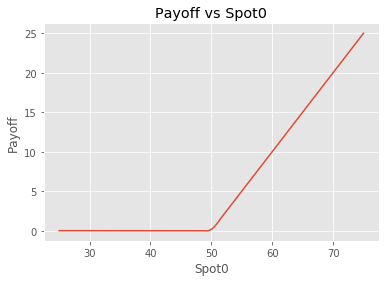

In [5]:
eq1_payoff = qbdp.Plotting(equity_option1,'payoff',x_axis_range=[25,75]).line_plot()
eq1_payoff.show()

Option Pricing and Greeks Calculation - Sandeep Kanao
To price option we need two data points: Pricing Model and Market data. We pass these two parameters to our option using engine method which returns engine object.

To start with we are using BlackScholesMerton as our pricing model and updating all other market parameters in engine.

In [20]:
eq1_engine = equity_option1.engine(model='BSM',pricing_date='20180620',spot0=55, rf_rate=0.05, volatility=0.25)

Calculating Option Premium

In [7]:
print(eq1_engine.valuation())

9.66280048534076


Calculating Option Greeks

In [8]:
print(eq1_engine.risk_parameters())

{'delta': 0.7599570602385954, 'gamma': 0.02258025430989674, 'theta': -0.01025008645649733, 'vega': 17.123101752878206, 'rho': 32.22287847936495, 'phi': -41.91215239069295}


We can also check what all models are available for valuation by using below command

In [12]:
print(equity_option1.list_models())

BSM, MC_GBM, Binomial


PnL is simply payoff minus current option premium

Note: We need to pass pricing object for pnl plot, unlike payoff plot where we pass option object

PnL Plotting

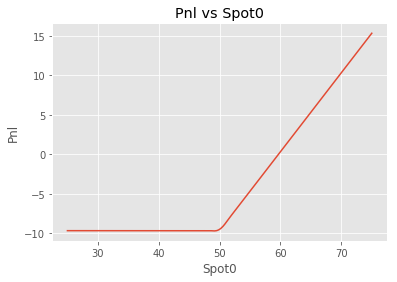

In [13]:
eq1_pnl = qbdp.Plotting(eq1_engine, 'pnl', x_axis_range=[25,75]).line_plot()
eq1_pnl.show()

Plotting Premium and Payoff together

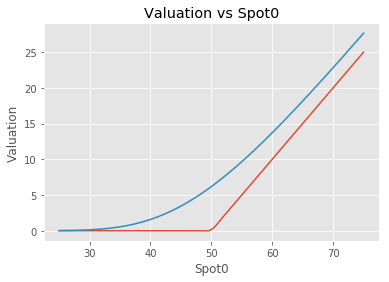

In [14]:
eq1_payoff = qbdp.Plotting(equity_option1,'payoff',x_axis_range=[25,75]).line_plot()
eq1_pnl = qbdp.Plotting(eq1_engine, 'valuation', x_axis_range=[25,75]).line_plot()
eq1_pnl.show()

Plotting Greeks

Delta

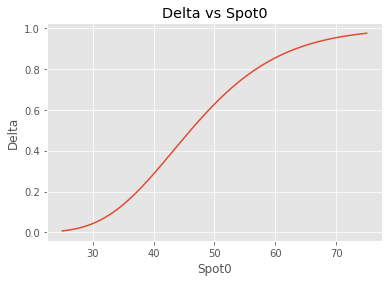

In [15]:
eq1_delta = qbdp.Plotting(eq1_engine, 'delta', x_axis_range=[25,75]).line_plot()
eq1_delta.show()

Gamma

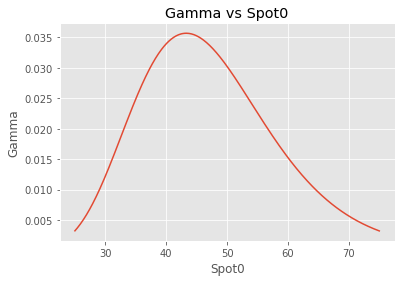

In [16]:
eq1_delta = qbdp.Plotting(eq1_engine, 'gamma', x_axis_range=[25,75]).line_plot()
eq1_delta.show()

Theta

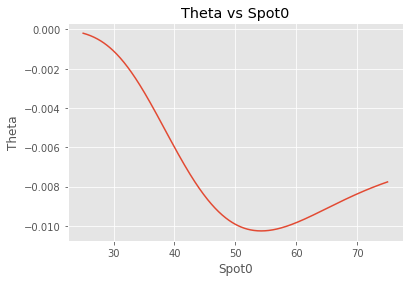

In [17]:
eq1_delta = qbdp.Plotting(eq1_engine, 'theta', x_axis_range=[25,75]).line_plot()
eq1_delta.show()

Vega

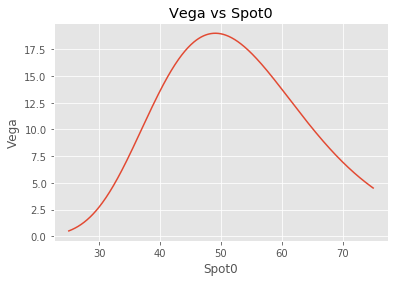

In [18]:
eq1_delta = qbdp.Plotting(eq1_engine, 'vega', x_axis_range=[25,75]).line_plot()
eq1_delta.show()

Rho

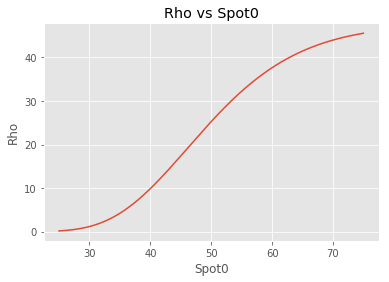

In [19]:
eq1_delta = qbdp.Plotting(eq1_engine, 'rho', x_axis_range=[25,75]).line_plot()
eq1_delta.show()